# Why Pandas?

A lot of what we end up doing has data that's organized in some kind of table format.  Each row may be a subject or an observation and we have a number of bits of data associated with this.  We might have the observation date, the condition that was being used and several scores for example.  A generic term for this kind of setup is a "data frame" and it's used in most every stats package that I can think of.

Scientific Python has a nice implementation of this, called Pandas and if you want to do something like load in an Excel table and analyze things or if you want to do the sorts of data analysis one might do in R, you're going to get to know Pandas.

Now, you can do everything we're going to lay out here without Pandas.  It'd just be more of a pain.  What Pandas does for you is gives you the ability to easily mix columns with different data types (e.g., strings, integers, and floats) and the ability to easily select bits and pieces of the data.

# Data frames and series

To get started, try the following:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD'))

(Note, much of this is modified from the [10-minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) on the [main pandas docs](http://pandas.pydata.org/pandas-docs/stable/index.html) site) 

What we've done here apart from importing things is to create a "data frame" called df.  It's got 4 columns with the imaginative names of A, B, C, and D.  It's got 6 observations (rows) and it's just filled with random numbers for now.  Have a look:

In [2]:
print(df)
df.describe()

          A         B         C         D
0  0.652033  0.346538 -0.720394 -0.054137
1  1.506004 -0.274139  1.319222  1.490255
2  0.528867  0.741919 -0.109293 -1.227570
3 -0.008141 -0.270398  0.745527 -0.046284
4  0.542719 -0.537720  0.100714  1.344356
5 -1.080613  0.599527  0.269061  1.574087


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.356811,0.100954,0.267473,0.513451
std,0.856895,0.530325,0.704323,1.134558
min,-1.080613,-0.537720,-0.720394,-1.227570
25%,0.126111,-0.273204,-0.056791,-0.052174
50%,0.535793,0.038070,0.184888,0.649036
75%,0.624704,0.536280,0.626411,1.453780
max,1.506004,0.741919,1.319222,1.574087


A data series is just a 1D version of the data frame



In [3]:
s=pd.Series([3,1,4,1,5,9])
print(s)

0    3
1    1
2    4
3    1
4    5
5    9
dtype: int64


# Grabbing bits of data: Columns and Rows

Want just a single column? One easy way is just to put the name of the column  (in quotes) inside brackets:

In [4]:
df['C']

0   -0.720394
1    1.319222
2   -0.109293
3    0.745527
4    0.100714
5    0.269061
Name: C, dtype: float64

Want more than one column? (see the bit about loc below before you go too far here)

In [5]:
df[['A','D']]

,A,D
0,0.652033,-0.054137
1,1.506004,1.490255
2,0.528867,-1.227570
3,-0.008141,-0.046284
4,0.542719,1.344356
5,-1.080613,1.574087


Want a range of rows?  You can do so easily by number:

In [6]:
df[1:3]

,A,B,C,D
1,1.506004,-0.274139,1.319222,1.490255
2,0.528867,0.741919,-0.109293,-1.227570


You can also do this by row name (aka index). Now, in our example so far, the index has been boring. It's just the numbers 0-5. These can be cooler than that, though. Here, we'll make a new data frame, df2, and again give it random values in A-D columns, but give each observation (each row) a name. Later, we'll see more legit ways of making the index names.

In [7]:
rng=np.random.default_rng()
df2 = pd.DataFrame(rng.normal(size=(6,4)), index=list('zyxwvu'), columns=list('ABCD'))

df2

,A,B,C,D
z,1.757676,-0.011621,0.257289,0.455004
y,0.261087,-0.401713,0.334370,0.305002
x,1.057702,-0.395920,-0.507680,0.248234
w,0.409102,0.028609,-1.101316,-1.105321
v,1.106163,1.178086,0.146872,-0.257771
u,0.255082,0.187995,-2.419165,0.069002


Now, we can grab a range of rows (observations) by naming the start one and the end one **_(note, not end-plus-one, but actual end)_**.

In [8]:
df2['y':'v']

,A,B,C,D
y,0.261087,-0.401713,0.334370,0.305002
x,1.057702,-0.395920,-0.507680,0.248234
w,0.409102,0.028609,-1.101316,-1.105321
v,1.106163,1.178086,0.146872,-0.257771


***In the space below***, create a dataframe called `grp1` that has 3 columns called "zIQ", "zAge", and "zPotential".  Have 8 rows of each and fill them with random numbers.  Use `describe()` to print out the summary statistics.

In [43]:
grp1= pd.DataFrame(np.random.randn(8, 3), columns = ['zIQ', 'zAge', 'zPotential'])

grp1.describe()

,zIQ,zAge,zPotential
count,8.000000,8.000000,8.000000
mean,0.250149,-0.068088,0.116551
std,0.747373,1.189295,1.016959
min,-1.170693,-1.840984,-1.452880
25%,0.009291,-0.581474,-0.465815
50%,0.209722,-0.454019,0.224880
75%,0.662930,0.630281,0.732620
max,1.333024,1.880858,1.635806


# Grabbing by label and index revisited - loc and iloc

The above examples all work, but Pandas really wants you to use the .loc (label) and .iloc (index number) operators. They give you the flexibility to combine row and column filters and are a bit more powerful. Using loc, we could get all observations of columns A and D with:

In [14]:
df2.loc[:,['A','D']]

,A,D
z,1.757676,0.455004
y,0.261087,0.305002
x,1.057702,0.248234
w,0.409102,-1.105321
v,1.106163,-0.257771
u,0.255082,0.069002


We could get everything on subjects y, x and w with:

In [15]:
df2.loc['y':'w']

,A,B,C,D
y,0.261087,-0.401713,0.334370,0.305002
x,1.057702,-0.395920,-0.507680,0.248234
w,0.409102,0.028609,-1.101316,-1.105321


We could get just columns D and B on these (in that order) with:


In [16]:
df2.loc['y':'w',['D','B']]

,D,B
y,0.305002,-0.401713
x,0.248234,-0.395920
w,-1.105321,0.028609


If you like numbers rather than labels, use _.iloc_ and remember that, like Python, we're now doing ranges as start:end+1:



In [17]:
df2.iloc[1:4,[3,1]]

,D,B
y,0.305002,-0.401713
x,0.248234,-0.395920
w,-1.105321,0.028609


# Grabbing single values

If all you want is a single value out of the data frame, you're best off using _at_ (label) or _iat_ (row,column -- both 0-indexed)

In [ ]:
print(df2)
print(df2.at['w','B']) #get single value out of dataframe
print(df2.iat[3,1]) #get single value out of dataframe 

          A         B         C         D
z  1.757676 -0.011621  0.257289  0.455004
y  0.261087 -0.401713  0.334370  0.305002
x  1.057702 -0.395920 -0.507680  0.248234
w  0.409102  0.028609 -1.101316 -1.105321
v  1.106163  1.178086  0.146872 -0.257771
u  0.255082  0.187995 -2.419165  0.069002
0.028608831837822146
0.028608831837822146


# Adding new columns

If you give a column name that doesn't exist, Pandas assumes you want to create it. So, you could say:

In [19]:
df2['Sum1']=df2['A'] + df2['B']

print(df2)

          A         B         C         D      Sum1
z  1.757676 -0.011621  0.257289  0.455004  1.746055
y  0.261087 -0.401713  0.334370  0.305002 -0.140625
x  1.057702 -0.395920 -0.507680  0.248234  0.661782
w  0.409102  0.028609 -1.101316 -1.105321  0.437711
v  1.106163  1.178086  0.146872 -0.257771  2.284250
u  0.255082  0.187995 -2.419165  0.069002  0.443077


and we'd add A and B, creating a new variable Sum1 out of this. Remember, this is all still tied in with Numpy nicely, so if you want to leverage off of Numpy, you can. Here, we'll have Numpy do it's sum-along-an-axis routine to sum up A-D:

In [20]:
df2['Sum2']=np.sum(df2.iloc[:,0:4],1)

print(df2)

          A         B         C         D      Sum1      Sum2
z  1.757676 -0.011621  0.257289  0.455004  1.746055  2.458347
y  0.261087 -0.401713  0.334370  0.305002 -0.140625  0.498746
x  1.057702 -0.395920 -0.507680  0.248234  0.661782  0.402336
w  0.409102  0.028609 -1.101316 -1.105321  0.437711 -1.768926
v  1.106163  1.178086  0.146872 -0.257771  2.284250  2.173351
u  0.255082  0.187995 -2.419165  0.069002  0.443077 -1.907086


***Take your `grp1` from above*** and create a `zMean` column that's the average of your three existing columns.  Then print out the value of the whole dataframe.

In [44]:
grp1['zMean'] = np.mean(grp1.iloc[:, 0:-1], 1)

print(grp1)
                        
                

        zIQ      zAge  zPotential     zMean
0  0.590255 -0.448439    0.942324  0.070908
1 -0.096264 -0.499591   -0.278967 -0.297928
2 -1.170693  1.214703    0.662719  0.022005
3  0.350071 -0.827125    0.255312 -0.238527
4  0.880955  0.435474   -1.452880  0.658214
5  1.333024 -0.459600   -1.026356  0.436712
6  0.069372  1.880858    1.635806  0.975115
7  0.044476 -1.840984    0.194448 -0.898254


You can, of course, just pass in an array of values as well. Let's give these a species:

In [28]:
df2['Species']=['rat','mouse','mouse','rat','rat','human']

df2

,A,B,C,D,Sum1,Sum2,Species
z,1.757676,-0.011621,0.257289,0.455004,1.746055,2.458347,rat
y,0.261087,-0.401713,0.334370,0.305002,-0.140625,0.498746,mouse
x,1.057702,-0.395920,-0.507680,0.248234,0.661782,0.402336,mouse
w,0.409102,0.028609,-1.101316,-1.105321,0.437711,-1.768926,rat
v,1.106163,1.178086,0.146872,-0.257771,2.284250,2.173351,rat
u,0.255082,0.187995,-2.419165,0.069002,0.443077,-1.907086,human


# Grabbing by criteria

Here we get to get fancy. We can grab data based on some sort of criterion. For example, let's say we wanted all the data from df2 in which the B column was positive:

In [29]:
df2[df2['B'] > 0]

,A,B,C,D,Sum1,Sum2,Species
w,0.409102,0.028609,-1.101316,-1.105321,0.437711,-1.768926,rat
v,1.106163,1.178086,0.146872,-0.257771,2.284250,2.173351,rat
u,0.255082,0.187995,-2.419165,0.069002,0.443077,-1.907086,human


Or, let's just grab all the rats:

In [30]:
df2[df2['Species'] == 'rat']

,A,B,C,D,Sum1,Sum2,Species
z,1.757676,-0.011621,0.257289,0.455004,1.746055,2.458347,rat
w,0.409102,0.028609,-1.101316,-1.105321,0.437711,-1.768926,rat
v,1.106163,1.178086,0.146872,-0.257771,2.284250,2.173351,rat


Or, let's use the _isin_ (is in) operator to get all the rodents and put these into a frame called rodents:

In [31]:
rodents=df2[df2['Species'].isin(['rat','mouse'])]

rodents

,A,B,C,D,Sum1,Sum2,Species
z,1.757676,-0.011621,0.257289,0.455004,1.746055,2.458347,rat
y,0.261087,-0.401713,0.334370,0.305002,-0.140625,0.498746,mouse
x,1.057702,-0.395920,-0.507680,0.248234,0.661782,0.402336,mouse
w,0.409102,0.028609,-1.101316,-1.105321,0.437711,-1.768926,rat
v,1.106163,1.178086,0.146872,-0.257771,2.284250,2.173351,rat


Here are two other ways I could have gotten to that same rodents data frame:
```
rodents=df2[df2['Species'] != 'human']
rodents=df2[~(df2['Species'] == 'human')]
```

***Take your `grp1` dataframe***, and turn any value that is less than -1.0 into `np.nan`

In [ ]:
grp1[grp1[0:-1] <  -1] = np.nan
print(grp1)

,zIQ,zAge,zPotential,zMean
0,0.590255,-0.448439,0.942324,0.070908
1,-0.096264,-0.499591,-0.278967,-0.297928
2,NaN,1.214703,0.662719,0.022005
3,0.350071,-0.827125,0.255312,-0.238527
4,0.880955,0.435474,NaN,0.658214
5,1.333024,-0.459600,NaN,0.436712
6,0.069372,1.880858,1.635806,0.975115
7,0.044476,-1.840984,0.194448,-0.898254


# Missing data

Pandas is setup to deal well with missing data. When you do things like ask Pandas for means, etc. it'll gracefully ignore any missing bits in the calculations. Let's make a copy of df2 here and flag one of the human bits as invalid by setting its value to _None_

In [46]:
df2c = df2.copy()
df2c.at['u','D']= None
df2c

,A,B,C,D,Sum1,Sum2,Species
z,1.757676,-0.011621,0.257289,0.455004,1.746055,2.458347,rat
y,0.261087,-0.401713,0.334370,0.305002,-0.140625,0.498746,mouse
x,1.057702,-0.395920,-0.507680,0.248234,0.661782,0.402336,mouse
w,0.409102,0.028609,-1.101316,-1.105321,0.437711,-1.768926,rat
v,1.106163,1.178086,0.146872,-0.257771,2.284250,2.173351,rat
u,0.255082,0.187995,-2.419165,NaN,0.443077,-1.907086,human



So, if we compute some means here, we can see the following (Note the different values for D based on df2c having one value flagged as None.):

In [ ]:
print(df2.mean())
print(df2c.mean())

TypeError: Could not convert ['ratmousemouseratrathuman'] to numeric

# Loading and saving data

You can, of course, bring in data via NumPy and just stick it in a Pandas data frame.  Odds are, though, that you'll want to leverage off of the nice, [built-in Pandas routines](http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out) to get things in and out using either "CSV" (comma separated values) or Excel formats.  

CSV is just a text file with each column separated by a "delimiter".  This can be a comma, but might be a space or a tab.  It's a very simple format that anything should be able to read and write.  If it's a simple file with no header and using commas, you might have:


```
data = pd.read_csv('foo.txt')
```


But, let's say it's got the top row having a header that gives the names of each of the columns.  You'd have:


```
data = pd.read_csv('foo.txt',header=0)
```


Use a space instead of a comma as the delimiter?


```
data = pd.read_csv('foo.txt',header=0,sep=' ')
```


Note, there is also pd.read_table, which offers very similar functionality.  

Excel files are handled just as easily.  


```
data = pd.read_excel('foo.xlsx')
data = pd.read_excel('foo.xls','Sheet2')
```


Once you've got a data frame you'd like to save:


```
pd.to_csv('results.csv')
pd.to_excel('results.xlsx')
```


# Plotting and visualizing

Perhaps the simplest visualization is a table.  

In [50]:
df2.describe()

,A,B,C,D,Sum1,Sum2
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.807802,0.097573,-0.548272,-0.047642,0.905375,0.309461
std,0.602841,0.580549,1.069482,0.572887,0.915852,1.863815
min,0.255082,-0.401713,-2.419165,-1.105321,-0.140625,-1.907086
25%,0.298091,-0.299845,-0.952907,-0.176078,0.439053,-1.226111
50%,0.733402,0.008494,-0.180404,0.158618,0.552430,0.450541
75%,1.094048,0.148148,0.229685,0.290810,1.474987,1.754700
max,1.757676,1.178086,0.334370,0.455004,2.284250,2.458347


But, we'll want more than that usually. While you'll sometimes need to just grab bits out of your data frame and pass this on to matplotlib, Pandas has built in a set of handy plotting functions to the data frames themselves. They leverage off of matplotlib by try to make your life easier. For example:

<Axes: >

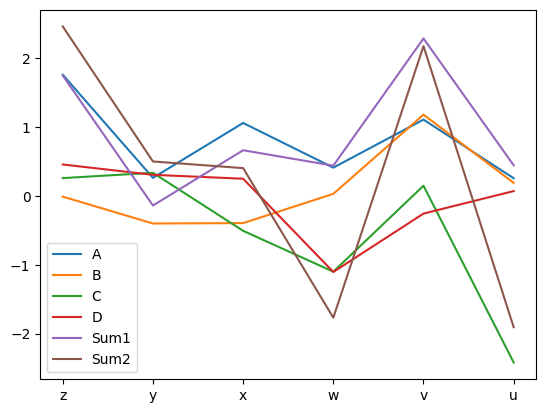

In [51]:
df2.plot()

There's a lot more buried inside dataframe.plot()... bar plots, histograms, scatters, box plots, etc. Here are a few examples, but I strongly encourage you to have a look at the [visualization section of the manual](http://pandas.pydata.org/pandas-docs/stable/visualization.html) for more.  


In [ ]:
df2.plot.scatter(x='B',y='C')

df2.plot.box()

## Subplots

Often, we want to have more than one plot shown at a time.  Fortunately, since Pandas is built on matplotlib, we can leverage off of matplotlib's _subplot_() routine.


In [ ]:
rng=np.random.default_rng()
df = pd.DataFrame(rng.normal(size=(6,4)), index=list('zyxwvu'), columns=list('ABCD'))

fig,axes=plt.subplots(2,2)
df.plot.scatter(x='A',y='B',ax=axes[0,0])
df.plot.scatter(x='A',y='C',ax=axes[0,1])
df.plot.scatter(x='A',y='D',ax=axes[1,0])
df.plot.scatter(x='B',y='C',ax=axes[1,1])

Key to this working is that we call _plt.subplots(nrows,ncols)_ here and save "handles" to the figures and to the axes.  These axes are our subplots.  So, when we want to put a particular scatter in a particular subplot, all we need to do is to tell the plot function (_scatter()_ in this case) what axis (subplot) to use.   

# Grouping

Pandas has a great ability to group / collapse / aggregate feature that will make your life a lot easier.  If you want more of a tutorial, [have a look here](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%204%20-%20Find%20out%20on%20which%20weekday%20people%20bike%20the%20most%20with%20groupby%20and%20aggregate.ipynb) or [here](http://pandas.pydata.org/pandas-docs/stable/10min.html#grouping). Let's take our df2 and group it by species:


In [ ]:
print(df2)
grp_species = df2.groupby('Species')

At this point, you have an object that has your data grouped by the species column. From here, you can now do things like:

In [ ]:
grp_species.mean()

Of course, you could, if you want just that, put this together in one step by:

In [ ]:
df2.groupby('Species').mean()

Now, the neat thing about this and about Python being "object-oriented" (remember, everything is an object) is that all the cool bits you know about data frames and series and such apply to these groups. That's why you can do the .mean() bit here. All those same functions apply.  Heck, even the plotting applies.


In [ ]:
df2.groupby('Species').mean().plot.bar()

Just to be clear, I could have done this in several steps


```
grp_species = df2.groupby('Species')
grp_species_m = grp_species.mean()
grp_species_m.plot.bar()
```


But, by now you should be starting to get comfortable with that chained style of calling things.

Note, you can group by more than one key as well.  Here, we just had 'Species', but if we had gender in this we could:


```
df2.groupby(['Species','Gender'])
```
## What if a function isn't in there?

OK, so you've got something you'd like to run on the grouped data, but it's not built into Pandas.  Now what, smartypants?  You can use the _.agg_ or _.aggregate()_ functions to grab that data and apply some other function to it.  Here, we'll just use the mean again to show how it works:

In [ ]:
print('Normal mean')
print(grp_species.mean())
print('\nAggregate')
print(grp_species.aggregate(np.mean))

And you can get fancier by having multiple functions applied:

In [ ]:
summary=grp_species.aggregate([np.mean,np.std])
summary